## Example with fermions

In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

## Define the parameters of the Hubbard model

In [2]:
## Hubbard model
L=10

## Kinetic energy TB Hamiltonian
K=np.zeros((2*L,2*L))
for i in range(L-1):
    K[i,i+1]=K[i+1,i]=-1                 ## spin up
    K[L+i,L+i+1]=K[L+i+1,L+i]=-1         ## spin down

## U ni nj for Hubbard
U=2.0
Umat=np.zeros((2*L,2*L))
for i in range(L):
    Umat[i,i+L]=U
    K[i,i]=K[L+i,L+i]=-U/2

Vijkl={}
    
model = varttpy.Fermionic(K,Umat,Vijkl)

## Solve using DMRG
- Check the variance

In [3]:
sol=varttpy.DMRG(model.Ham())
sol.bond_dim=256
sol.nIter_diag=32
Npart=model.NParticle();
print("sweep energy Npart")
eners=[]
for i in range(7):
    if i > 4: sol.nIter_diag=64
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))
    eners += [sol.energy]

variance_rel=sol.H2(4*sol.bond_dim)/sol.energy**2-1
print("H^2/E^2-1=", variance_rel)

sweep energy Npart
1 -17.873019039034286 10.001785758140931
2 -17.90872750272429 9.999999999911479
3 -17.908735813659657 9.999999999998986
4 -17.908735995903218 9.999999999998884
5 -17.908736019651364 9.999999999998947
6 -17.908736023931123 9.999999999998845
7 -17.908736025925343 9.999999999998856
H^2/E^2-1= 1.894022716442123e-10


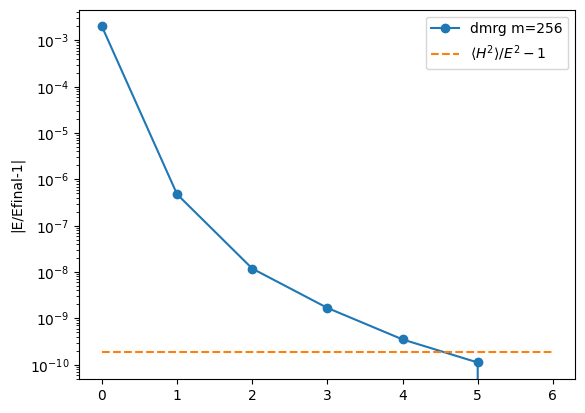

In [4]:
import matplotlib.pyplot as plt
plt.yscale('log')
eRef=np.min(eners)
plt.ylabel("|E/Efinal-1|")
plt.plot([abs(x/eRef-1) for x in eners], '-o', label=f'dmrg m={sol.bond_dim}')
plt.plot([variance_rel for x in eners], '--', label="$\\langle H^2 \\rangle /E^2-1$")
plt.legend()

## Check the convergence of the variance

In [5]:
print("Npart=",sol.Expectation(Npart))
print("H2/E^2-1")
ener=sol.Expectation(model.Ham())
m=sol.bond_dim
for mi in [m//2, m, 2*m, 3*m, 4*m]:
    print(sol.H2(mi)/ener**2-1)

Npart= 9.999999999998856
H2/E^2-1
3.0094953256121215e-05 1.329592563947215e-06
2.5874902962463864e-06 4.788978846927987e-06
1.7274801589195476e-08 7.860473663200386e-05
2.9670843559870264e-10 0.00021856537562055765
1.8940604640249603e-10 0.0002464417942799475
